In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

%matplotlib inline

In [2]:
# stimulus folder path
imgs = Path.cwd() / "stimulus_set_final_all" 

# images to update
imgs_to_view = sorted(["dis_cat_93", "dis_cow_2", "dis_monkey_97", "dis_face_187"])

In [3]:
imgpaths_all = [imgpath for imgpath in imgs.glob('**/*') 
                        if "dis_" in str(imgpath)]

imgname_frompath = lambda p: str(p).split("/")[-1].split(".")[0]

imgs_to_view_paths = sorted([imgpath for imgpath in imgpaths_all 
                        if imgname_frompath(imgpath) in imgs_to_view])

assert imgs_to_view_paths

### look a specific sigma values

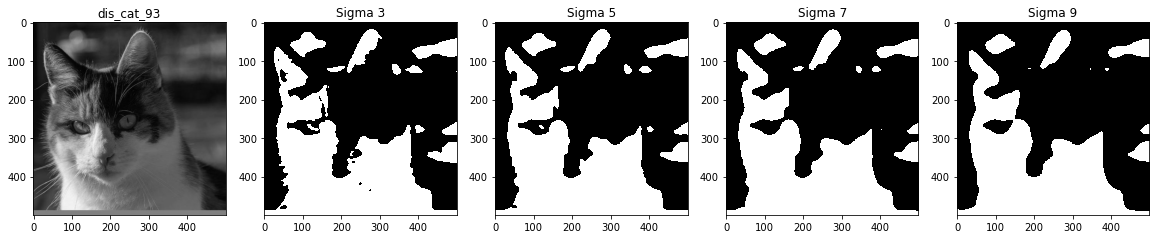

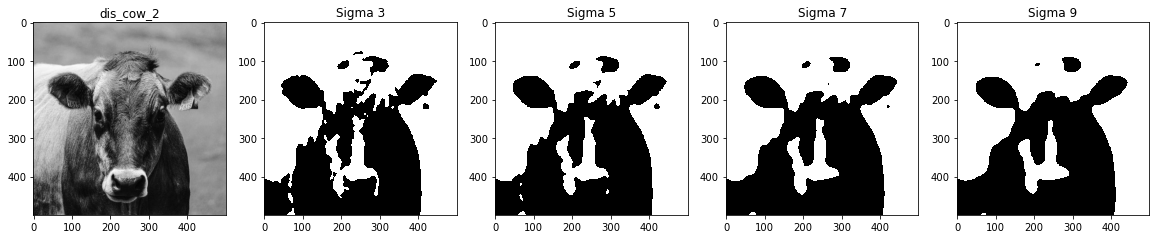

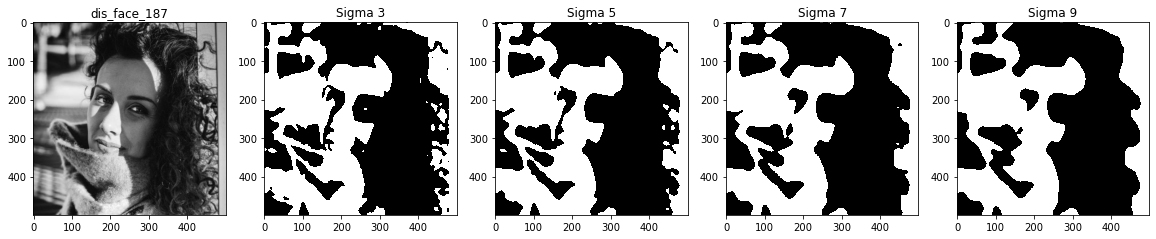

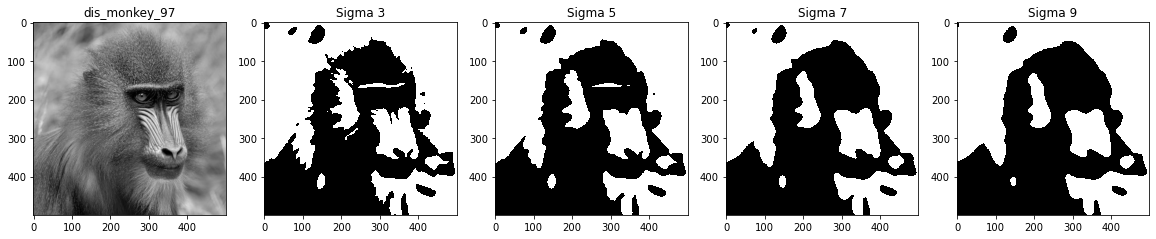

In [4]:
SIGMA_VALS = (0, 3, 5, 7, 9)

for imgpath in imgs_to_view_paths:
    try:
        image = skimage.io.imread(imgpath)[:,:,:3]
        gray_image = skimage.color.rgb2gray(image)

        f, a = plt.subplots(1, len(SIGMA_VALS), figsize=(20,20))
        for i in range(len(a.ravel())):
            if (i % len(SIGMA_VALS) == 0):
                a[i].imshow(image)
                a[i].set_title(imgname_frompath(imgpath))
                continue
            blurred = skimage.filters.gaussian(gray_image, sigma=SIGMA_VALS[i])
            t = skimage.filters.threshold_otsu(blurred)
            a[i].imshow(blurred > t, cmap='gray', interpolation='nearest')
            a[i].set_title(f"Sigma {SIGMA_VALS[i]}")
    except Exception as e:
        print(e)
        continue

In [5]:
# enter new values delimited by space (in the same order as above)
sigmas_to_save = input("new sigma values").split(" ")

assert len(imgs_to_view) == len(sigmas_to_save)

imgs_to_save = dict(map(lambda x, y: (x, int(y)), imgs_to_view, sigmas_to_save))
imgs_to_save

{'dis_cat_93': 2, 'dis_cow_2': 3, 'dis_face_187': 4, 'dis_monkey_97': 1}

In [6]:
OUTPUT_DIR = imgs

for imgname, imgpath in zip(imgs_to_save.keys(), imgs_to_view_paths):
    try:
        image = skimage.io.imread(imgpath)[:,:,:3]
        gray_image = skimage.color.rgb2gray(image)
        blurred = skimage.filters.gaussian(gray_image, sigma=imgs_to_save[imgname])
        t = skimage.filters.threshold_otsu(blurred)

        plt.imsave((OUTPUT_DIR / f"{imgname}.jpg"), blurred > t, cmap='gray')
        # print(OUTPUT_DIR / f"{imgname}.jpg")
        
    except Exception as e:
        print(e)
        continue

/Users/mn/Desktop/g_images/stimulus_set_final_all/dis_cat_93.jpg
/Users/mn/Desktop/g_images/stimulus_set_final_all/dis_cow_2.jpg
/Users/mn/Desktop/g_images/stimulus_set_final_all/dis_face_187.jpg
/Users/mn/Desktop/g_images/stimulus_set_final_all/dis_monkey_97.jpg
